# Importing necessary libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score,recall_score
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score,f1_score

# Loading the datasets

In [2]:
train=pd.read_csv('C:\\Users\\A_R_COMPUTERS\\Downloads\\file (1)\\train.csv')
test=pd.read_csv('C:\\Users\\A_R_COMPUTERS\\Downloads\\file (1)\\test.csv')

# Dataset statistics

In [3]:
train.describe()

,ID,Duration,Net Sales,Commision (in value),Age,Claim
count,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000
mean,6005.745804,58.256108,48.554673,12.219963,39.555725,0.166699
std,2306.450475,109.138708,60.198589,22.847645,13.762473,0.372710
min,2000.000000,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,4015.000000,10.000000,19.800000,0.000000,33.000000,0.000000
50%,6002.000000,24.000000,29.500000,0.000000,36.000000,0.000000
75%,8004.000000,57.000000,55.000000,13.380000,43.000000,0.000000
max,10000.000000,4881.000000,682.000000,262.760000,118.000000,1.000000


# Checking for null values

In [4]:
train.isnull().sum()

ID                      0
Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64

# Finding the skewness in the numerical features

In [5]:
train.skew()

ID                      -0.001854
Duration                15.352524
Net Sales                2.811837
Commision (in value)     3.535694
Age                      2.947891
Claim                    1.788598
dtype: float64

# Replacing negative values in the Duration column with median

In [6]:
train.loc[train['Duration']<0,'Duration']=24.000000

# Finding upper limit for eliminating outliers from the duration column

In [7]:
q1 = np.nanpercentile(train['Duration'], 25)
q3 = np.nanpercentile(train['Duration'], 75)
iqr = q3 - q1
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
upper_limit,lower_limit

(127.5, -60.5)

# Eliminating outliers using masking technique

In [8]:
mask1 = train['Duration'] < 127.5
ccc = train[mask1]

In [9]:
ccc.describe()

,ID,Duration,Net Sales,Commision (in value),Age,Claim
count,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000
mean,6004.414791,30.197882,36.195029,8.414021,39.581301,0.142506
std,2304.636929,28.007754,31.505215,14.799466,13.989122,0.349572
min,2000.000000,0.000000,-287.100000,0.000000,0.000000,0.000000
25%,4016.000000,9.000000,19.000000,0.000000,34.000000,0.000000
50%,6005.000000,20.000000,27.000000,0.000000,36.000000,0.000000
75%,7995.750000,43.000000,47.000000,11.550000,43.000000,0.000000
max,10000.000000,127.000000,507.000000,178.200000,118.000000,1.000000


# Here we see that too many rows were getting eliminated after reducing the skewness from the duration column. So we dropped the idea of eliminating outliers and Hence the skewness.

# Rechecking the skew value in the data

In [10]:
train.skew()

ID                      -0.001854
Duration                15.352831
Net Sales                2.811837
Commision (in value)     3.535694
Age                      2.947891
Claim                    1.788598
dtype: float64

In [11]:
train.describe()

,ID,Duration,Net Sales,Commision (in value),Age,Claim
count,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000
mean,6005.745804,58.258039,48.554673,12.219963,39.555725,0.166699
std,2306.450475,109.137879,60.198589,22.847645,13.762473,0.372710
min,2000.000000,0.000000,-389.000000,0.000000,0.000000,0.000000
25%,4015.000000,10.000000,19.800000,0.000000,33.000000,0.000000
50%,6002.000000,24.000000,29.500000,0.000000,36.000000,0.000000
75%,8004.000000,57.000000,55.000000,13.380000,43.000000,0.000000
max,10000.000000,4881.000000,682.000000,262.760000,118.000000,1.000000


# Class Imbalance

Text(0.5, 1.0, 'Class Imbalance')

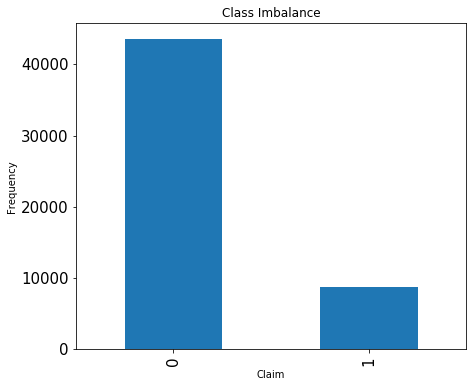

In [12]:
aa = train["Claim"].value_counts().plot(kind="bar", figsize=(7,6), fontsize=15)
aa.set_xlabel("Claim")
aa.set_ylabel("Frequency")
aa.set_title("Class Imbalance")

# Insurance Claim vs Agency Type

Text(0.5, 1.0, 'Insurance claims by Agency type')

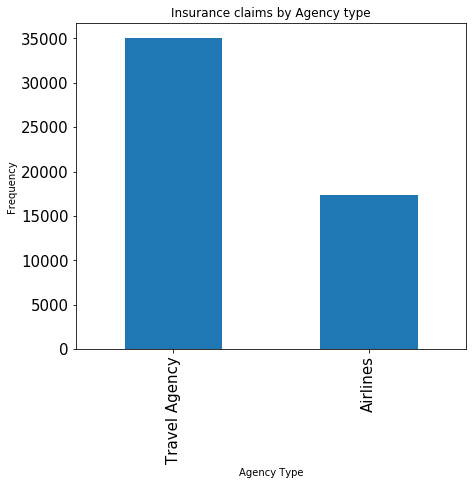

In [13]:
at = train["Agency Type"].value_counts().plot(kind="bar", figsize=(7,6), fontsize=15)
at.set_xlabel("Agency Type")
at.set_ylabel("Frequency")
at.set_title("Insurance claims by Agency type")

# Product Name vs Insurance Claim

Text(0.5, 1.0, 'Insurance claims by different products')

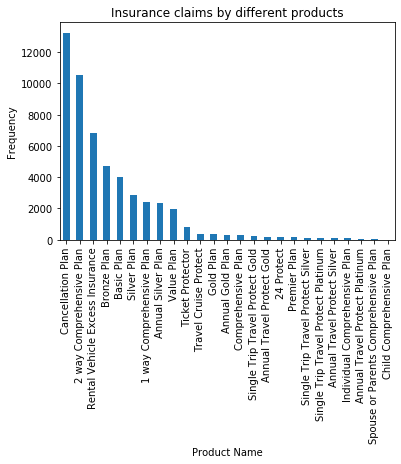

In [14]:
pn = train['Product Name'].value_counts().plot(kind='bar')
pn.set_xlabel("Product Name")
pn.set_ylabel("Frequency")
pn.set_title("Insurance claims by different products")

# Most visited Destiination?

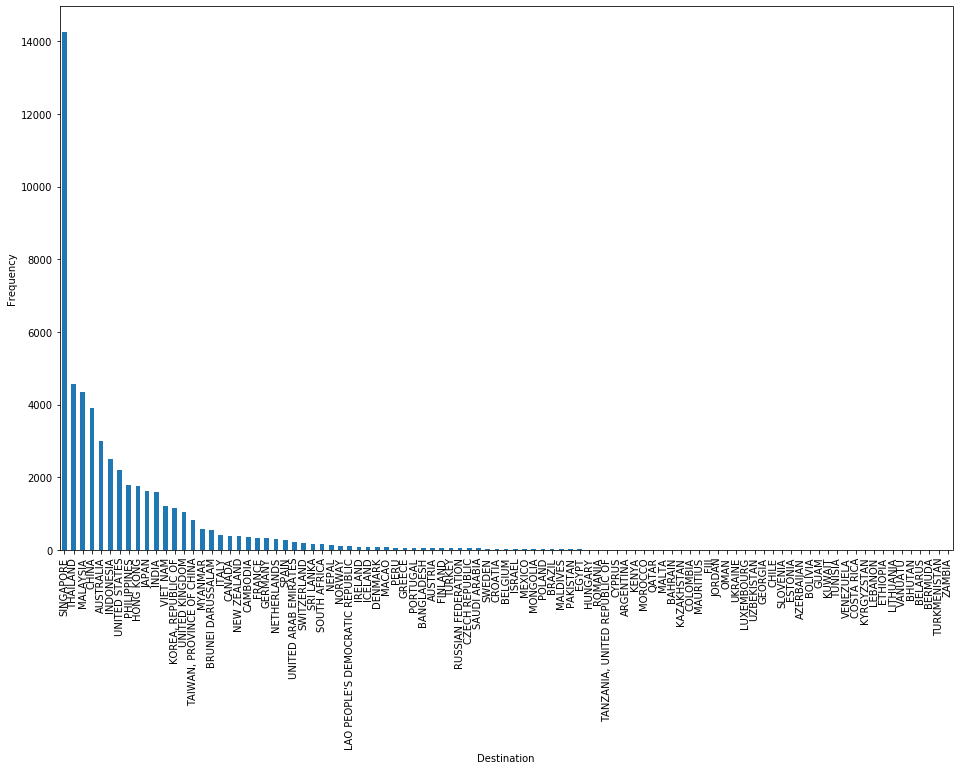

In [15]:
t=train['Destination'].value_counts().plot(kind='bar', figsize=(16, 10), rot=90)
t.set_xlabel('Destination')
t.set_ylabel("Frequency")
plt.show()

# Side by Side Boxplots of Duration vs Claim

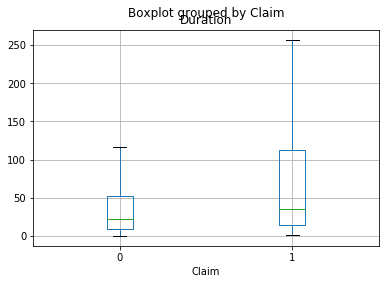

In [16]:
t=train.boxplot(column='Duration',by='Claim',showfliers=False)
plt.show()


# Claims by Agency Type

In [17]:
pd.crosstab(train['Agency Type'],train['Claim'],margins=True)

Claim,0,1,All
Agency Type,,,
Airlines,11792,5522,17314
Travel Agency,31798,3198,34996
All,43590,8720,52310


# Agencies and their types vs Claim

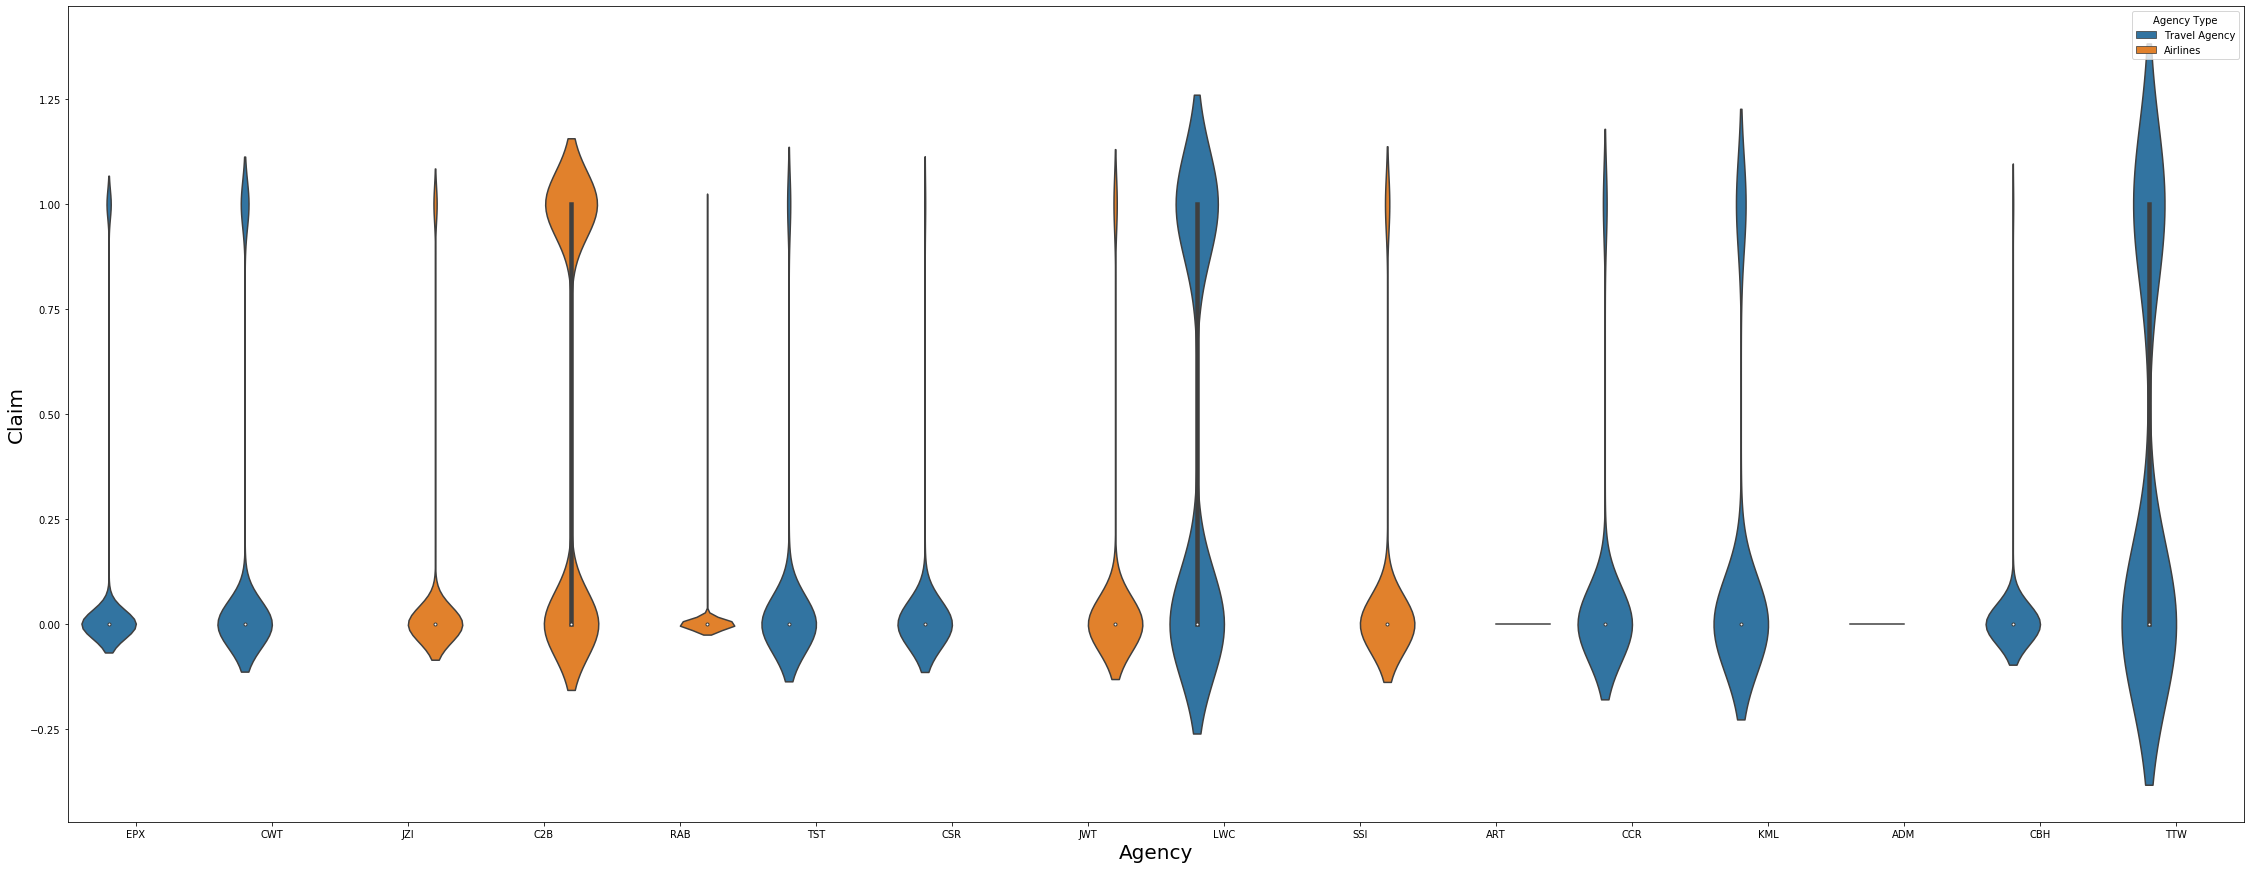

In [18]:
fig=plt.figure(figsize=(39,15))
a=sns.violinplot(x='Agency',y='Claim',data=train,hue='Agency Type',size=12)
a.set_xlabel('Agency',size=20)
a.set_ylabel('Claim',size=20)
plt.show()

# Grouping Age

In [19]:
def Age_Group(age):
    if age<60:
        return 'Adult'
    else:
        return 'Senior'
train['Age_Group']=train['Age'].map(lambda x:Age_Group(x))
train

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Age_Group
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61.0,PHILIPPINES,12.000000,0.0000,41,0,Adult
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4.0,MALAYSIA,17.000000,0.0000,35,0,Adult
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26.0,THAILAND,19.800000,11.8800,47,0,Adult
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15.0,HONG KONG,27.000000,0.0000,48,0,Adult
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15.0,MALAYSIA,37.000000,0.0000,36,0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
52305,5370,C2B,Airlines,Online,Annual Gold Plan,365.0,SINGAPORE,444.750593,111.1858,40,1,Adult
52306,5282,RAB,Airlines,Online,Value Plan,8.0,BRUNEI DARUSSALAM,23.000000,9.2000,54,0,Adult
52307,7083,C2B,Airlines,Online,Bronze Plan,38.0,SINGAPORE,61.100000,15.2800,37,0,Adult
52308,8523,EPX,Travel Agency,Online,Cancellation Plan,2.0,THAILAND,10.000000,0.0000,46,0,Adult


# Claims by age groups

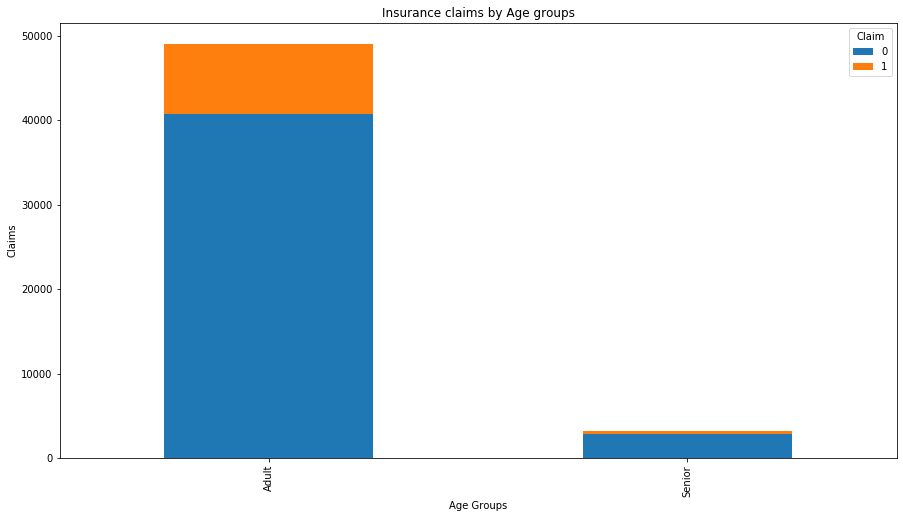

In [20]:
agc=train.groupby(['Age_Group','Claim']).size().unstack().plot(kind='bar',stacked=True,figsize=(15,8))
agc.set_xlabel("Age Groups")
agc.set_ylabel("Claims")
agc.set_title("Insurance claims by Age groups")
plt.show()

# Relationship beteen claims and categorical columns

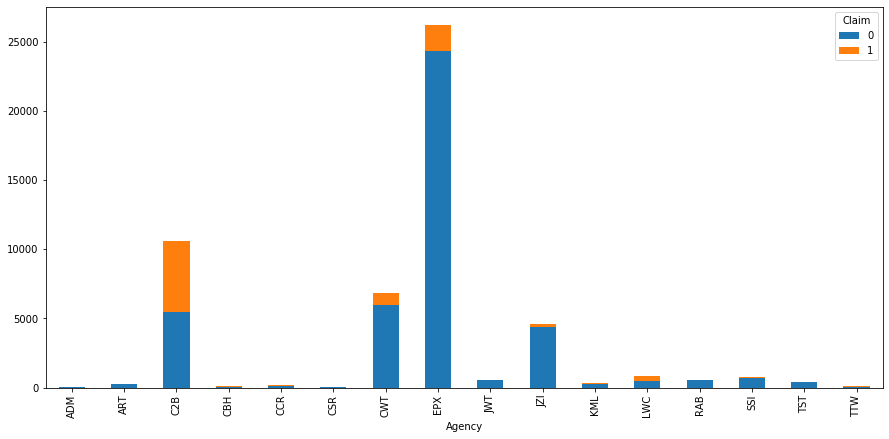

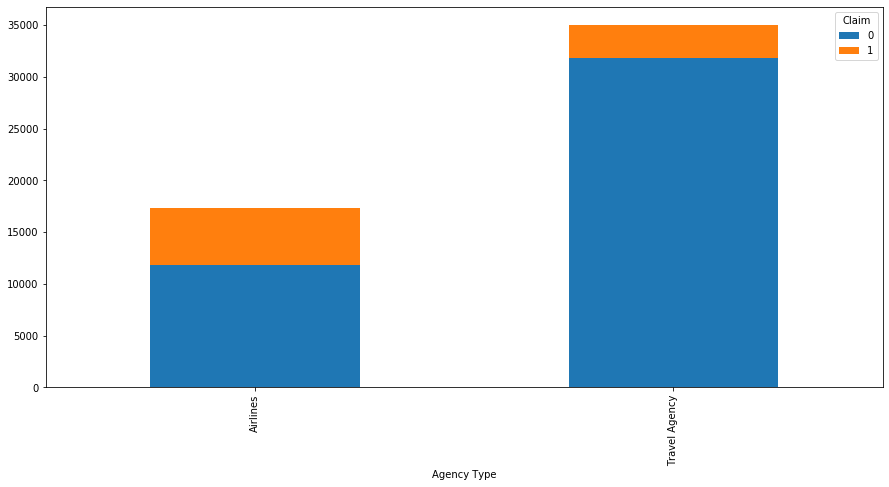

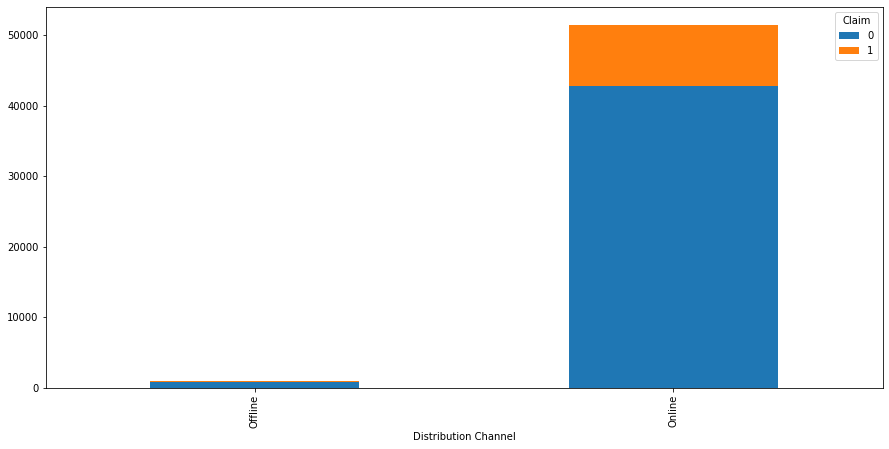

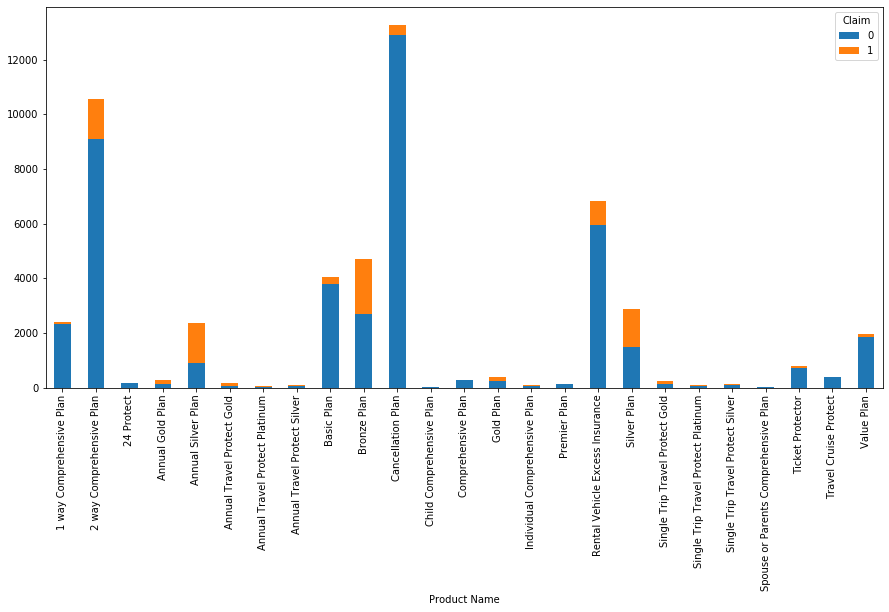

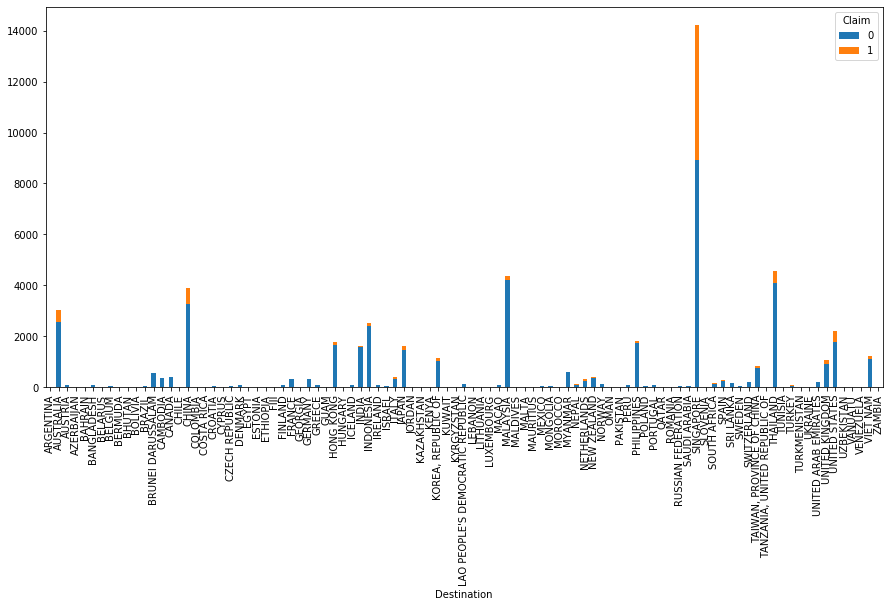

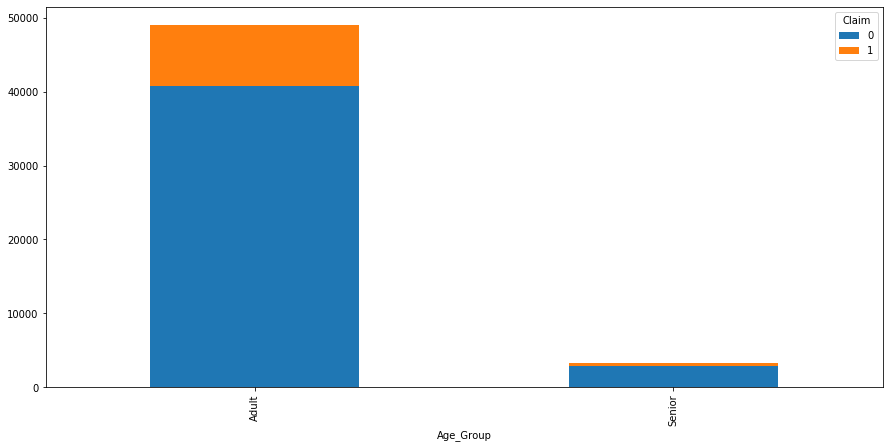

In [21]:
cat = train.select_dtypes(exclude=np.number)
for i in cat:
    train.groupby(i)['Claim'].value_counts().unstack().plot(kind='bar',stacked=True,figsize=(15,7))

# Products offered by different agencies

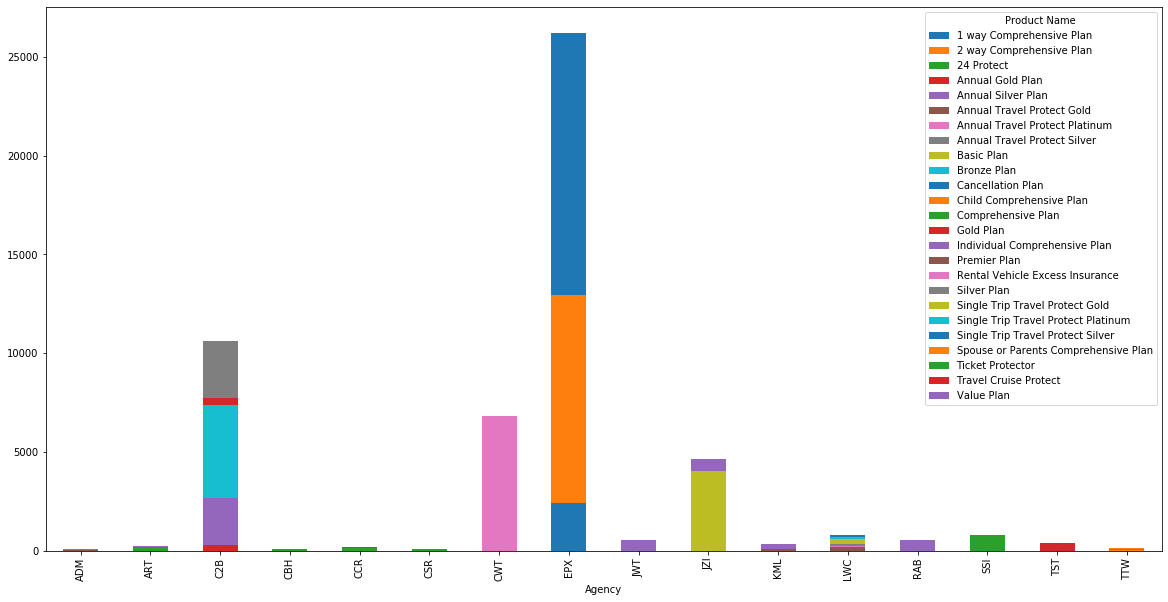

In [22]:
apn=train.groupby(['Agency','Product Name']).size().unstack()
apn.plot(kind='bar',stacked=True,figsize=(20,10))


# Commission earned through different agencies

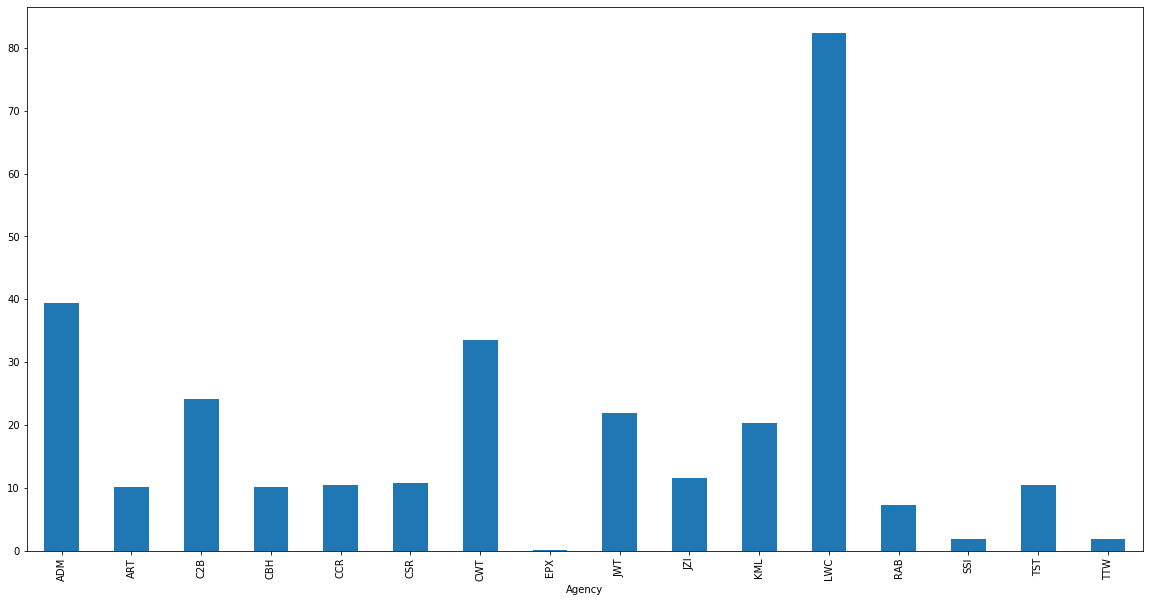

In [23]:
fig=plt.figure(figsize=(20,10))
train.groupby('Agency')['Commision (in value)'].mean().plot(kind = 'bar')

# Net sales by dofferent agencies

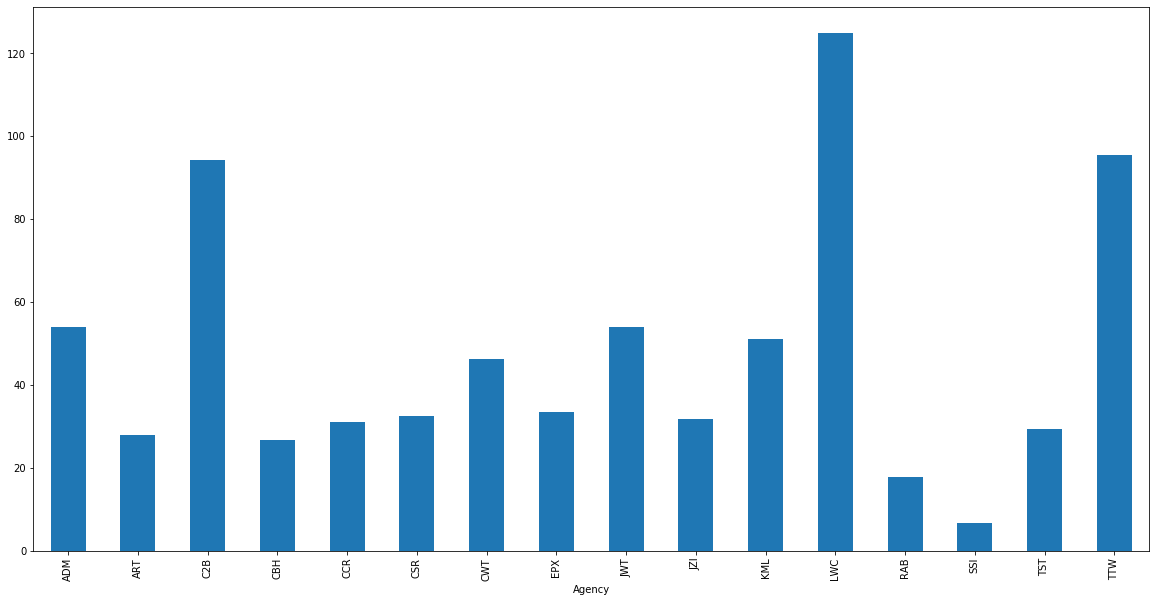

In [24]:
fig=plt.figure(figsize=(20,10))
train.groupby('Agency')['Net Sales'].mean().plot(kind = 'bar')

# Is duration a factor for deciding wether the claim will be granted or not

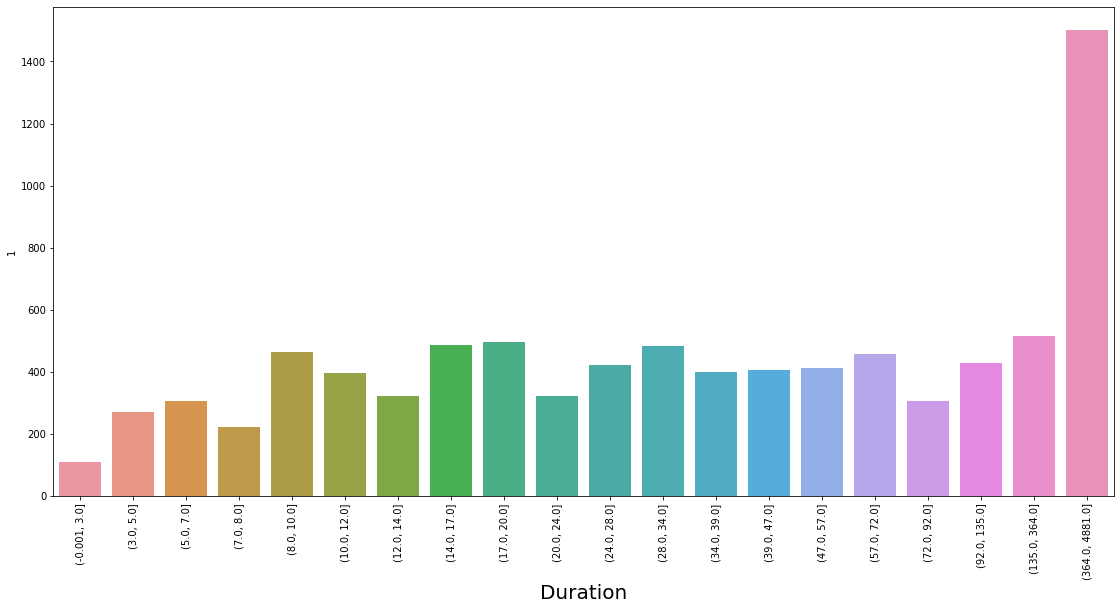

In [25]:
df2=pd.qcut(train['Duration'],20)
a=pd.crosstab(df2,train['Claim'])
fig=plt.figure(figsize=(19,9))
a=sns.barplot(a.index,a[1])
plt.xticks(rotation=90)
a.set_xlabel('Duration',size=20)
plt.show()

# Scatter plots of different features with each other

<Figure size 1368x720 with 0 Axes>

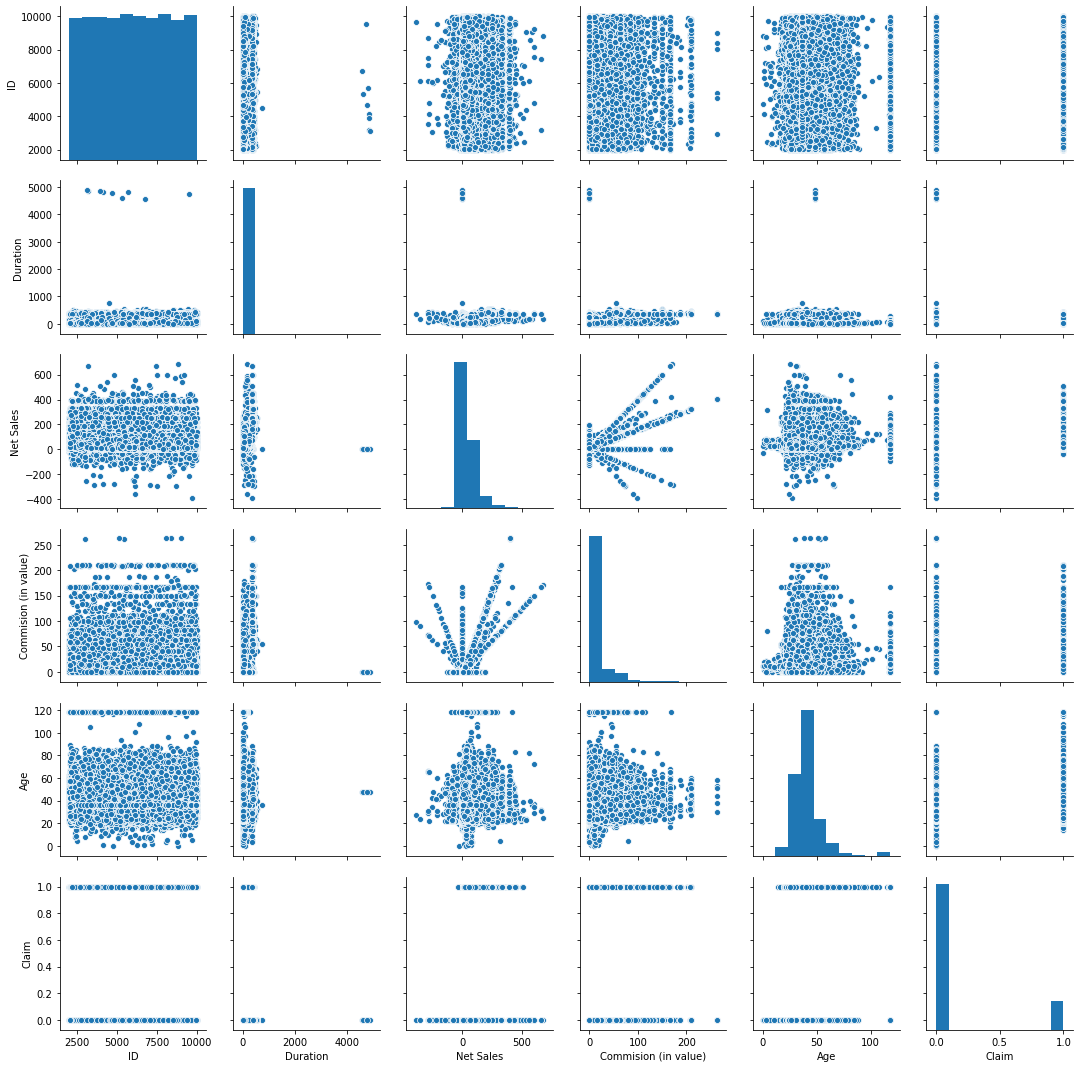

In [26]:
fig=plt.figure(figsize=(19,10))
sns.pairplot(train)
plt.show()

# Net Sales vs Comission

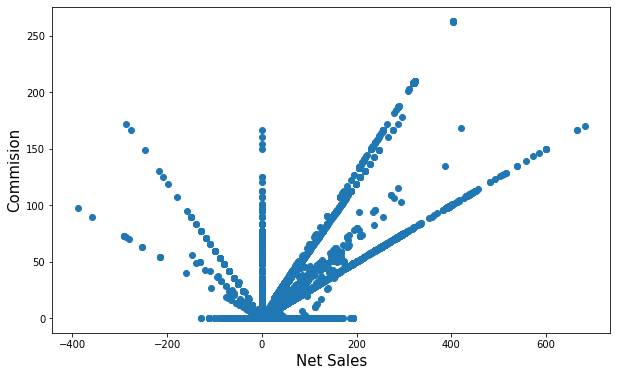

In [27]:
fig = plt.figure(figsize=(10,6))
plt.scatter(x = train['Net Sales'],y = train['Commision (in value)'])
plt.xlabel('Net Sales',size=15)
plt.ylabel('Commision',size=15)
plt.show()

column name: Duration
shapiro: 0.0
normal test: 0.0
mean: 58.25803861594341
median: 24.0
standard deviation : 109.13787894912366


C:\Users\A_R_COMPUTERS\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\class folder\Titanic\normality1.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  qqplot(df[col], line='s', ax=plt.subplot(1, 2, 2))


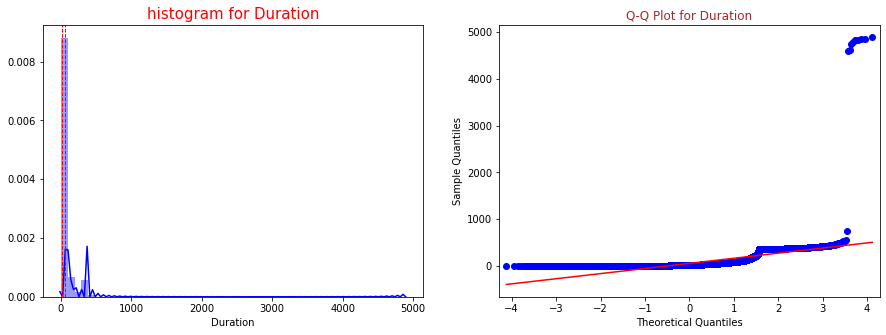

column name: Net Sales
shapiro: 0.0
normal test: 0.0
mean: 48.55467307386593
median: 29.5
standard deviation : 60.19858926705779


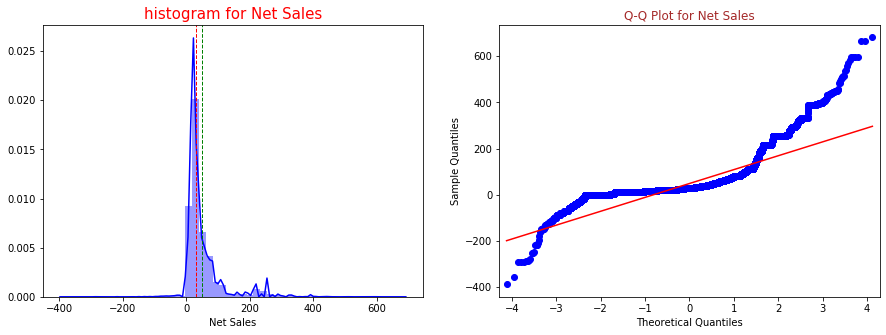

column name: Commision (in value)
shapiro: 0.0
normal test: 0.0
mean: 11.720235881823337
median: 0.0
standard deviation : 22.595228269903153


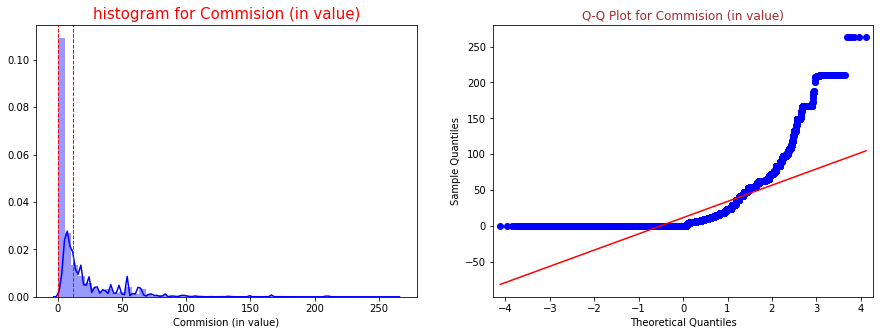

column name: Age
shapiro: 0.0
normal test: 0.0
mean: 39.555725482699295
median: 36.0
standard deviation : 13.762473160014347


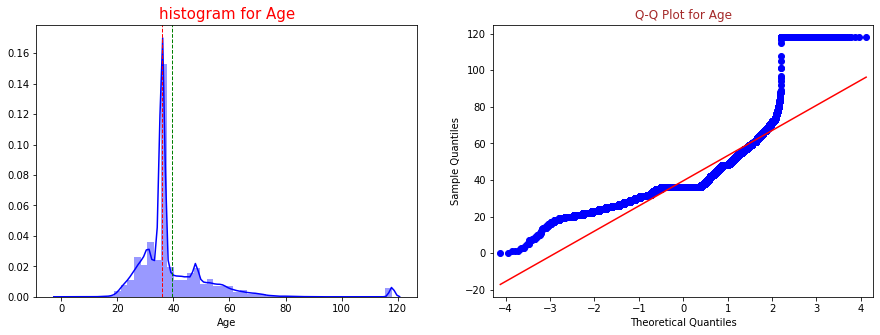

column name: Claim
shapiro: 0.0
normal test: 0.0
mean: 0.16669852800611737
median: 0.0
standard deviation : 0.3727100539764402


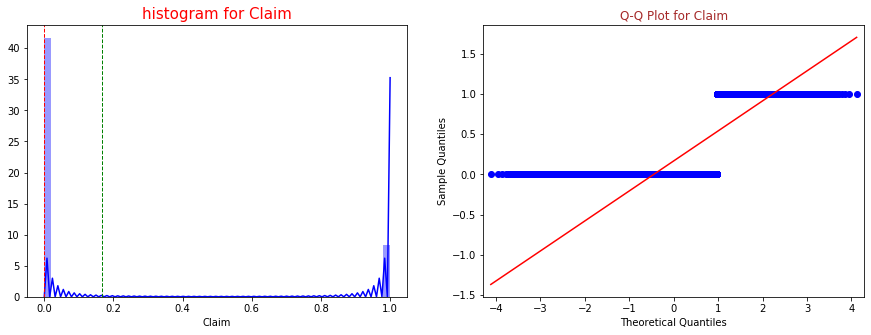

column name: Agency_ADM
shapiro: 0.0
normal test: 0.0
mean: 0.001070541005543873
median: 0.0
standard deviation : 0.03270191724201198


C:\class folder\Titanic\normality1.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  qqplot(df[col], line='s', ax=plt.subplot(1, 2, 2))


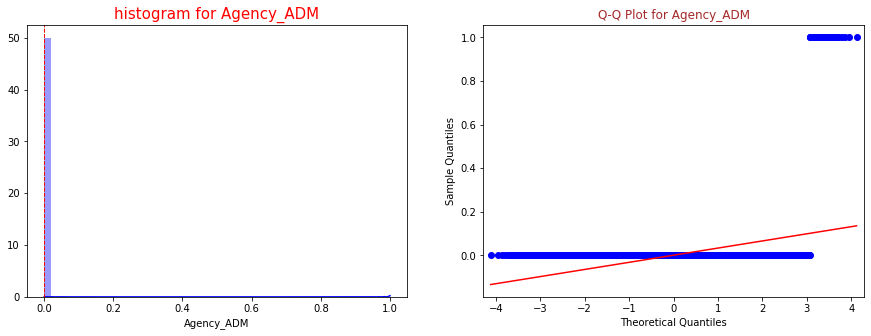

column name: Agency_ART
shapiro: 0.0
normal test: 0.0
mean: 0.004263047218505066
median: 0.0
standard deviation : 0.06515331761994399


C:\Users\A_R_COMPUTERS\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\class folder\Titanic\normality1.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  qqplot(df[col], line='s', ax=plt.subplot(1, 2, 2))


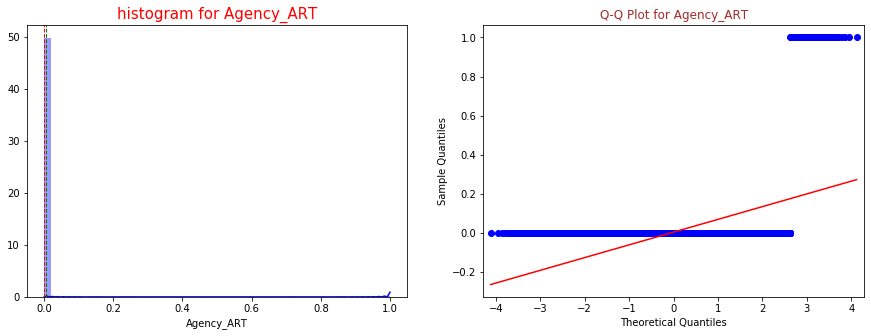

column name: Agency_C2B
shapiro: 0.0
normal test: 0.0
mean: 0.20292487096157522
median: 0.0
standard deviation : 0.40218087950506903


C:\Users\A_R_COMPUTERS\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\class folder\Titanic\normality1.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  qqplot(df[col], line='s', ax=plt.subplot(1, 2, 2))


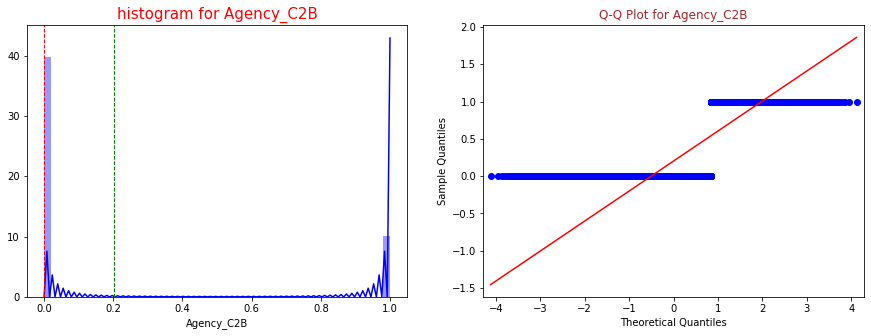

column name: Agency_CBH
shapiro: 0.0
normal test: 0.0
mean: 0.001452877078952399
median: 0.0
standard deviation : 0.03808928933032469


C:\Users\A_R_COMPUTERS\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\class folder\Titanic\normality1.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  qqplot(df[col], line='s', ax=plt.subplot(1, 2, 2))


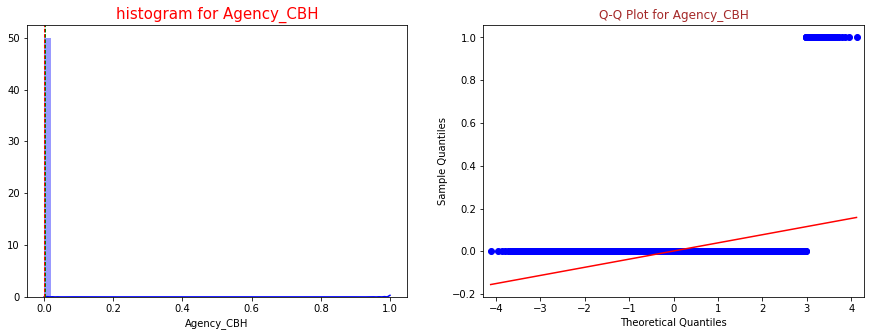

column name: Agency_CCR
shapiro: 0.0
normal test: 0.0
mean: 0.0029822213725865035
median: 0.0
standard deviation : 0.05452874993872912


C:\Users\A_R_COMPUTERS\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\class folder\Titanic\normality1.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  qqplot(df[col], line='s', ax=plt.subplot(1, 2, 2))


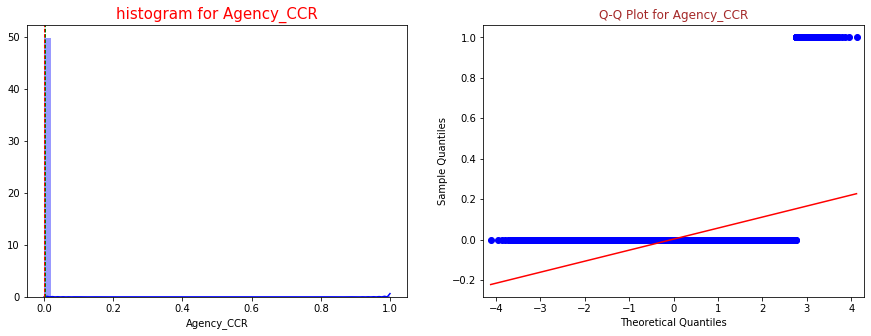

column name: Agency_CSR
shapiro: 0.0
normal test: 0.0
mean: 0.0011470082202255784
median: 0.0
standard deviation : 0.03384840461184798


C:\Users\A_R_COMPUTERS\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\class folder\Titanic\normality1.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  qqplot(df[col], line='s', ax=plt.subplot(1, 2, 2))


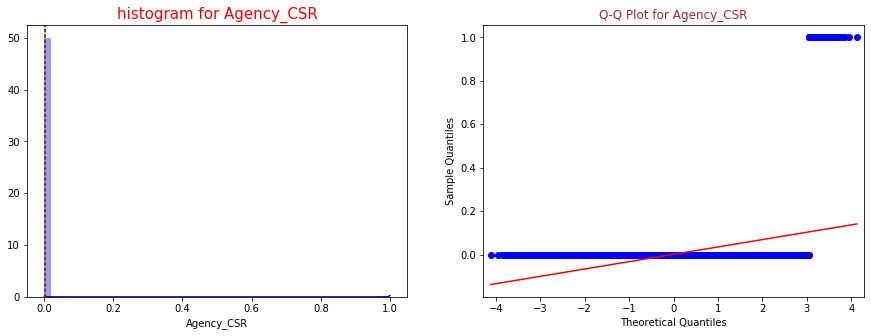

column name: Agency_CWT
shapiro: 0.0
normal test: 0.0
mean: 0.1302427834066144
median: 0.0
standard deviation : 0.33657356753375495


C:\Users\A_R_COMPUTERS\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\class folder\Titanic\normality1.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  qqplot(df[col], line='s', ax=plt.subplot(1, 2, 2))


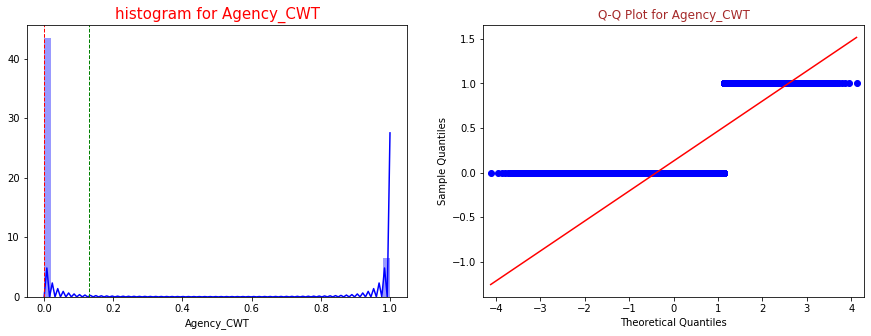

column name: Agency_EPX
shapiro: 0.0
normal test: 0.0
mean: 0.5012043586312369
median: 1.0
standard deviation : 0.50000332877376


C:\Users\A_R_COMPUTERS\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\class folder\Titanic\normality1.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  qqplot(df[col], line='s', ax=plt.subplot(1, 2, 2))


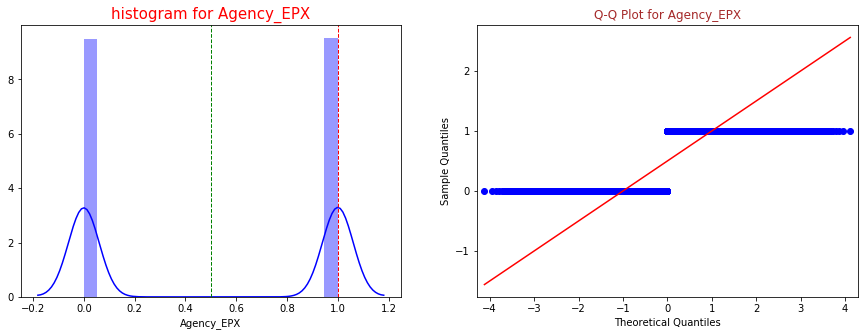

column name: Agency_JWT
shapiro: 0.0
normal test: 0.0
mean: 0.010514242018734467
median: 0.0
standard deviation : 0.10199946873714344


C:\Users\A_R_COMPUTERS\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\class folder\Titanic\normality1.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  qqplot(df[col], line='s', ax=plt.subplot(1, 2, 2))


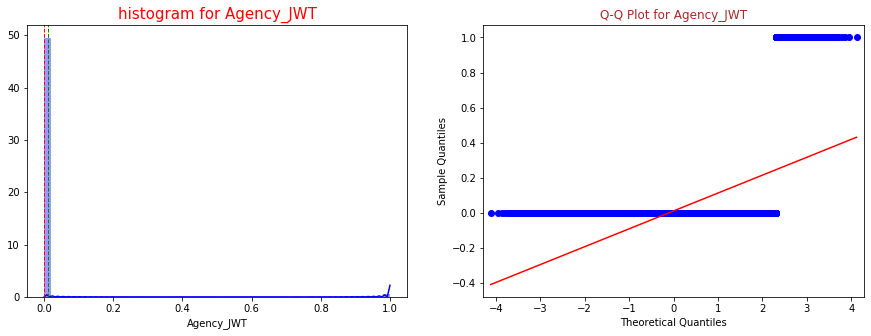

column name: Agency_JZI
shapiro: 0.0
normal test: 0.0
mean: 0.0883005161536991
median: 0.0
standard deviation : 0.28373416079207586


C:\Users\A_R_COMPUTERS\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\class folder\Titanic\normality1.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  qqplot(df[col], line='s', ax=plt.subplot(1, 2, 2))


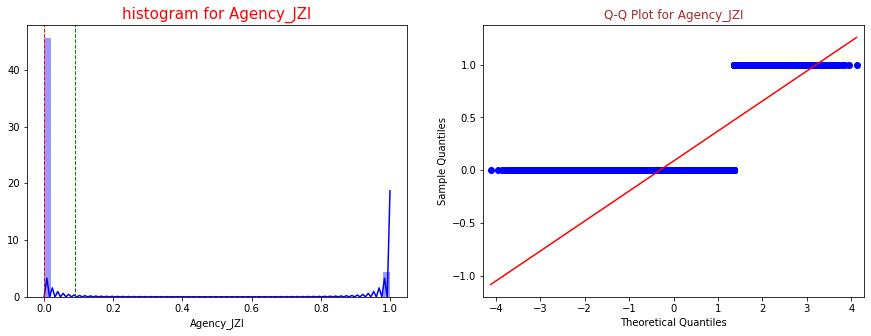

column name: Agency_KML
shapiro: 0.0
normal test: 0.0
mean: 0.005983559548843434
median: 0.0
standard deviation : 0.07712243686656338


C:\Users\A_R_COMPUTERS\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\class folder\Titanic\normality1.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  qqplot(df[col], line='s', ax=plt.subplot(1, 2, 2))


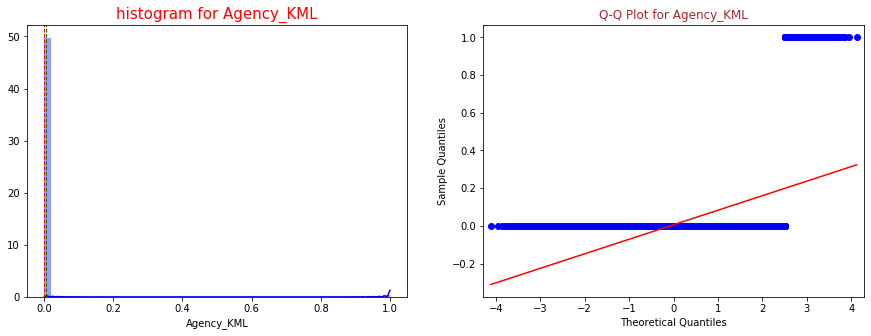

column name: Agency_LWC
shapiro: 0.0
normal test: 0.0
mean: 0.015408143758363602
median: 0.0
standard deviation : 0.1231707062809627


C:\Users\A_R_COMPUTERS\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\class folder\Titanic\normality1.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  qqplot(df[col], line='s', ax=plt.subplot(1, 2, 2))


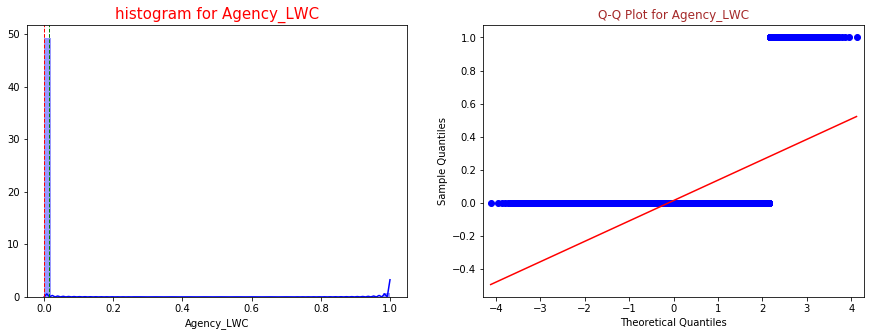

column name: Agency_RAB
shapiro: 0.0
normal test: 0.0
mean: 0.010074555534314663
median: 0.0
standard deviation : 0.09986615804041794


C:\Users\A_R_COMPUTERS\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\class folder\Titanic\normality1.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  qqplot(df[col], line='s', ax=plt.subplot(1, 2, 2))


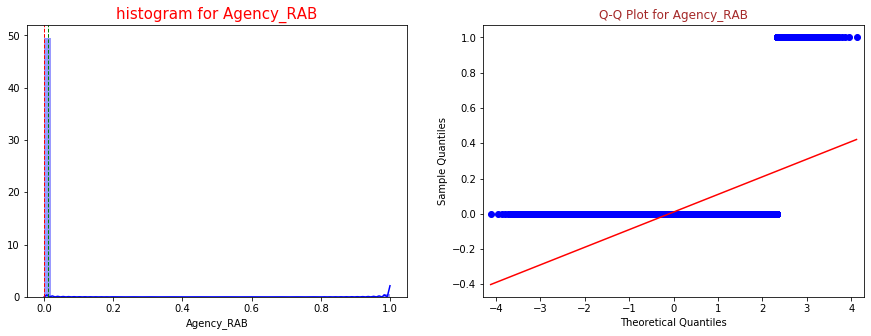

column name: Agency_SSI
shapiro: 0.0
normal test: 0.0
mean: 0.014911106862932517
median: 0.0
standard deviation : 0.12119837689785275


C:\Users\A_R_COMPUTERS\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\class folder\Titanic\normality1.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  qqplot(df[col], line='s', ax=plt.subplot(1, 2, 2))


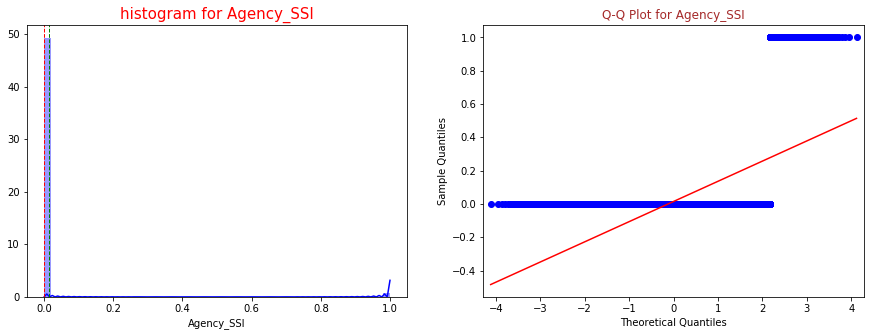

column name: Agency_TST
shapiro: 0.0
normal test: 0.0
mean: 0.007532020646147964
median: 0.0
standard deviation : 0.08646058187118578


C:\Users\A_R_COMPUTERS\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\class folder\Titanic\normality1.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  qqplot(df[col], line='s', ax=plt.subplot(1, 2, 2))


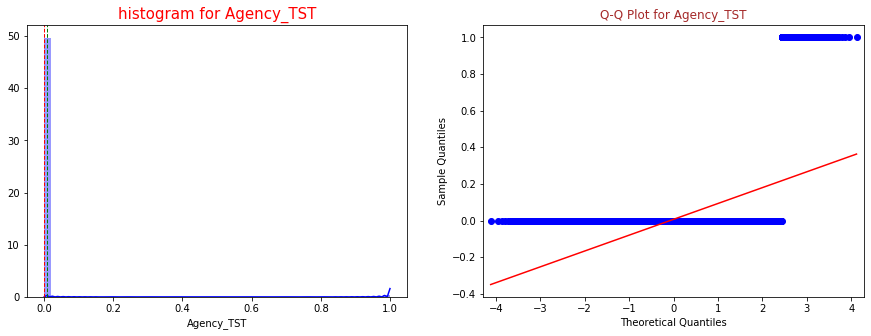

column name: Agency_TTW
shapiro: 0.0
normal test: 0.0
mean: 0.001988147581724336
median: 0.0
standard deviation : 0.04454472789350239


C:\Users\A_R_COMPUTERS\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\class folder\Titanic\normality1.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  qqplot(df[col], line='s', ax=plt.subplot(1, 2, 2))


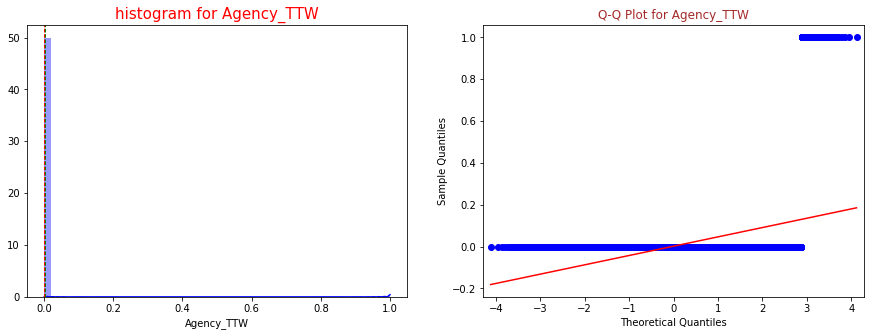

column name: Agency Type_Airlines
shapiro: 0.0
normal test: 0.0
mean: 0.330988338749761
median: 0.0
standard deviation : 0.47057336470830596


C:\Users\A_R_COMPUTERS\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\class folder\Titanic\normality1.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  qqplot(df[col], line='s', ax=plt.subplot(1, 2, 2))


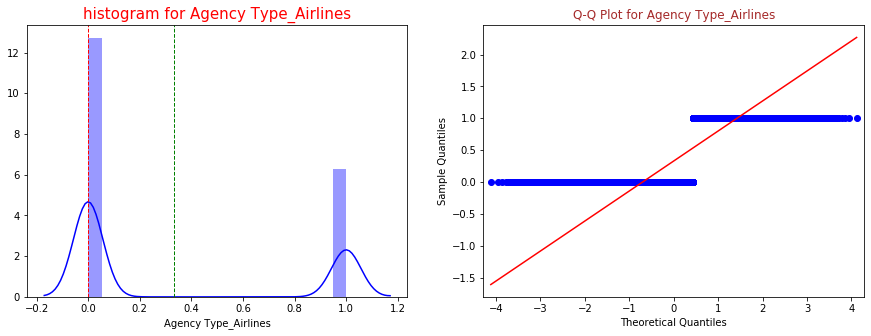

column name: Agency Type_Travel Agency
shapiro: 0.0
normal test: 0.0
mean: 0.6690116612502389
median: 1.0
standard deviation : 0.470573364708306


C:\Users\A_R_COMPUTERS\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\class folder\Titanic\normality1.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  qqplot(df[col], line='s', ax=plt.subplot(1, 2, 2))


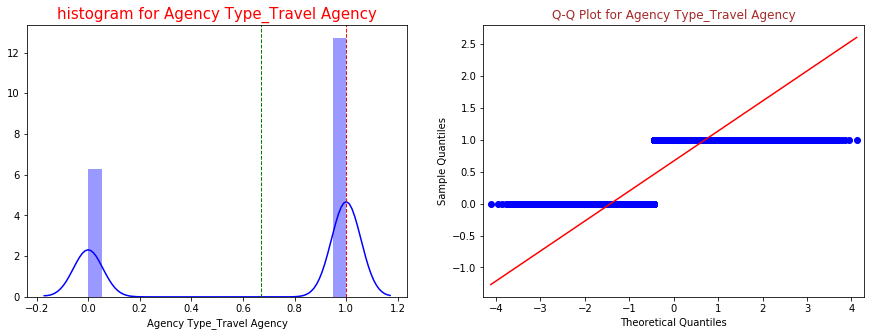

column name: Product Group_Average
shapiro: 0.0
normal test: 0.0
mean: 0.14333779392085644
median: 0.0
standard deviation : 0.3504203450023171


C:\Users\A_R_COMPUTERS\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\class folder\Titanic\normality1.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  qqplot(df[col], line='s', ax=plt.subplot(1, 2, 2))


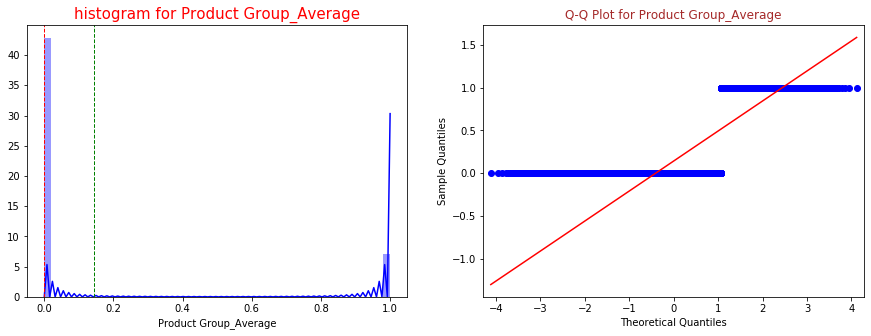

column name: Product Group_Less Popular
shapiro: 0.0
normal test: 0.0
mean: 0.1037086599120627
median: 0.0
standard deviation : 0.30488514357516816


C:\Users\A_R_COMPUTERS\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\class folder\Titanic\normality1.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  qqplot(df[col], line='s', ax=plt.subplot(1, 2, 2))


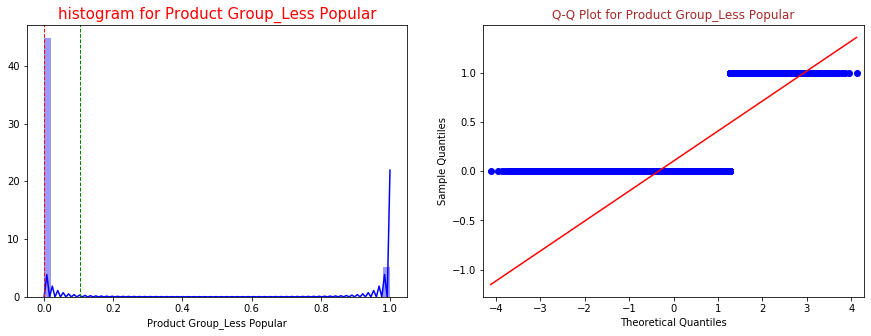

column name: Product Group_Popular
shapiro: 0.0
normal test: 0.0
mean: 0.7529535461670809
median: 1.0
standard deviation : 0.4312981098407714


C:\Users\A_R_COMPUTERS\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\class folder\Titanic\normality1.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  qqplot(df[col], line='s', ax=plt.subplot(1, 2, 2))


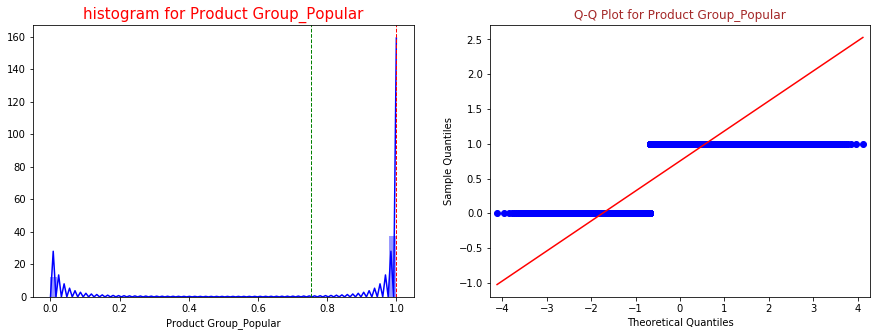

column name: Destination Group_Least Visited
shapiro: 0.0
normal test: 0.0
mean: 0.2838463008984898
median: 0.0
standard deviation : 0.45086745774848247


C:\Users\A_R_COMPUTERS\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\class folder\Titanic\normality1.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  qqplot(df[col], line='s', ax=plt.subplot(1, 2, 2))


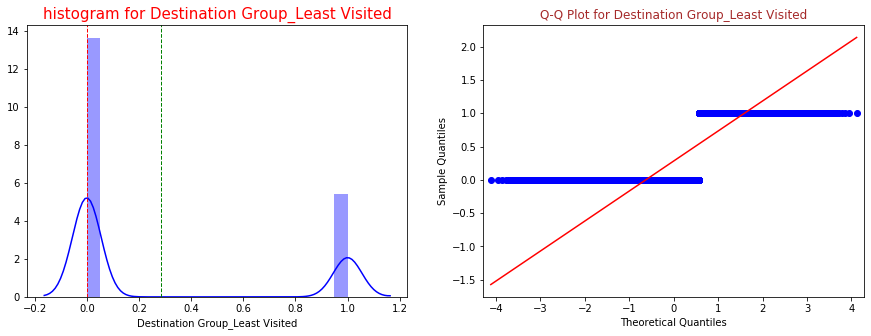

column name: Destination Group_Moderately Visited
shapiro: 0.0
normal test: 0.0
mean: 0.1410628942840757
median: 0.0
standard deviation : 0.34808974483012645


C:\Users\A_R_COMPUTERS\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\class folder\Titanic\normality1.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  qqplot(df[col], line='s', ax=plt.subplot(1, 2, 2))


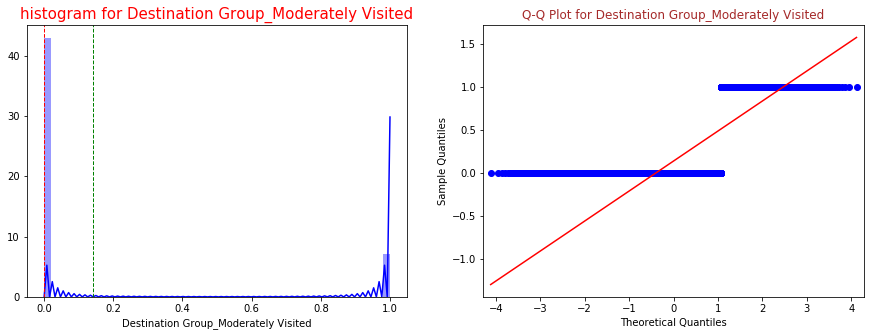

column name: Destination Group_Most Visited
shapiro: 0.0
normal test: 0.0
mean: 0.5750908048174346
median: 1.0
standard deviation : 0.49433393827404637


C:\Users\A_R_COMPUTERS\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\class folder\Titanic\normality1.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  qqplot(df[col], line='s', ax=plt.subplot(1, 2, 2))


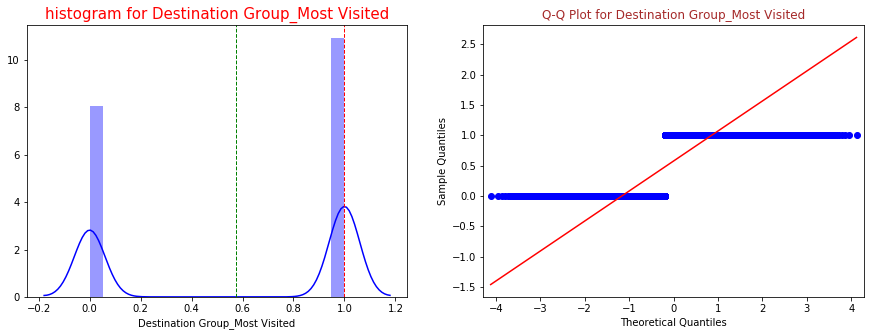

In [70]:
import sys
sys.path
sys.path.append('C:\\class folder\\Titanic')
from normality1 import normality_plots
numeric=train._get_numeric_data()
for i in numeric:
    normality_plots(train,i)

In [28]:

df6= train['Net Sales']<train['Commision (in value)']
df6.sum()
train.loc[train['Net Sales'] == 0.0, 'Commision (in value)'] = 0

# Dropping the Age Group column

In [29]:
train.drop('Age_Group',1,inplace=True)

In [30]:
train

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61.0,PHILIPPINES,12.000000,0.0000,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4.0,MALAYSIA,17.000000,0.0000,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26.0,THAILAND,19.800000,11.8800,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15.0,HONG KONG,27.000000,0.0000,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15.0,MALAYSIA,37.000000,0.0000,36,0
...,...,...,...,...,...,...,...,...,...,...,...
52305,5370,C2B,Airlines,Online,Annual Gold Plan,365.0,SINGAPORE,444.750593,111.1858,40,1
52306,5282,RAB,Airlines,Online,Value Plan,8.0,BRUNEI DARUSSALAM,23.000000,9.2000,54,0
52307,7083,C2B,Airlines,Online,Bronze Plan,38.0,SINGAPORE,61.100000,15.2800,37,0
52308,8523,EPX,Travel Agency,Online,Cancellation Plan,2.0,THAILAND,10.000000,0.0000,46,0


# Classifying the Products into Popular,Average,Less Popular

In [31]:
pnvc = train['Product Name'].value_counts()
pnvc

Cancellation Plan                       13254
2 way Comprehensive Plan                10555
Rental Vehicle Excess Insurance          6813
Bronze Plan                              4723
Basic Plan                               4042
Silver Plan                              2862
1 way Comprehensive Plan                 2409
Annual Silver Plan                       2348
Value Plan                               1961
Ticket Protector                          780
Travel Cruise Protect                     394
Gold Plan                                 380
Annual Gold Plan                          295
Comprehensive Plan                        278
Single Trip Travel Protect Gold           251
Annual Travel Protect Gold                183
24 Protect                                165
Premier Plan                              141
Single Trip Travel Protect Silver         130
Single Trip Travel Protect Platinum       100
Annual Travel Protect Silver               92
Individual Comprehensive Plan     

In [32]:
def Product_Group(x):
    if x in pnvc[0:5]:
        return 'Popular'
    elif x in pnvc[6:10]:
        return 'Average'
    else:
        return 'Less Popular'
train['Product Group'] = train['Product Name'].map(lambda x:Product_Group(x))
test['Product Group'] = test['Product Name'].map(lambda x:Product_Group(x))

# Classifying the Destination into Most visited,Moderately visited and Least Visited

In [33]:
dnvc = train['Destination'].value_counts()
dnvc

SINGAPORE       14242
THAILAND         4562
MALAYSIA         4359
CHINA            3909
AUSTRALIA        3011
                ...  
BHUTAN              2
BELARUS             2
BERMUDA             2
TURKMENISTAN        1
ZAMBIA              1
Name: Destination, Length: 97, dtype: int64

In [34]:
def Destination_Group(x):
    if x in dnvc[0:5]:
        return 'Most Visited'
    elif x in dnvc[6:10]:
        return 'Moderately Visited'
    else:
        return 'Least Visited'

In [35]:
train['Destination Group'] = train['Destination'].map(lambda x:Destination_Group(x))
test['Destination Group'] = test['Destination'].map(lambda x:Destination_Group(x))

# Dropping old unnecessary columns

In [36]:
train.drop(['Destination','Product Name'],axis=1,inplace=True)

In [37]:
train

,ID,Agency,Agency Type,Distribution Channel,Duration,Net Sales,Commision (in value),Age,Claim,Product Group,Destination Group
0,2010,EPX,Travel Agency,Online,61.0,12.000000,0.0000,41,0,Popular,Moderately Visited
1,4245,EPX,Travel Agency,Online,4.0,17.000000,0.0000,35,0,Popular,Most Visited
2,9251,CWT,Travel Agency,Online,26.0,19.800000,11.8800,47,0,Popular,Most Visited
3,4754,EPX,Travel Agency,Online,15.0,27.000000,0.0000,48,0,Popular,Moderately Visited
4,8840,EPX,Travel Agency,Online,15.0,37.000000,0.0000,36,0,Popular,Most Visited
...,...,...,...,...,...,...,...,...,...,...,...
52305,5370,C2B,Airlines,Online,365.0,444.750593,111.1858,40,1,Less Popular,Most Visited
52306,5282,RAB,Airlines,Online,8.0,23.000000,9.2000,54,0,Average,Least Visited
52307,7083,C2B,Airlines,Online,38.0,61.100000,15.2800,37,0,Popular,Most Visited
52308,8523,EPX,Travel Agency,Online,2.0,10.000000,0.0000,46,0,Popular,Most Visited


# Applying dummies on the datasets

In [38]:
train = pd.get_dummies(train)
train

,ID,Duration,Net Sales,Commision (in value),Age,Claim,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,...,Agency Type_Airlines,Agency Type_Travel Agency,Distribution Channel_Offline,Distribution Channel_Online,Product Group_Average,Product Group_Less Popular,Product Group_Popular,Destination Group_Least Visited,Destination Group_Moderately Visited,Destination Group_Most Visited
0,2010,61.0,12.000000,0.0000,41,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
1,4245,4.0,17.000000,0.0000,35,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
2,9251,26.0,19.800000,11.8800,47,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
3,4754,15.0,27.000000,0.0000,48,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
4,8840,15.0,37.000000,0.0000,36,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52305,5370,365.0,444.750593,111.1858,40,1,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
52306,5282,8.0,23.000000,9.2000,54,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,0
52307,7083,38.0,61.100000,15.2800,37,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
52308,8523,2.0,10.000000,0.0000,46,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1


In [39]:
train = pd.get_dummies(train)
train

,ID,Duration,Net Sales,Commision (in value),Age,Claim,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,...,Agency Type_Airlines,Agency Type_Travel Agency,Distribution Channel_Offline,Distribution Channel_Online,Product Group_Average,Product Group_Less Popular,Product Group_Popular,Destination Group_Least Visited,Destination Group_Moderately Visited,Destination Group_Most Visited
0,2010,61.0,12.000000,0.0000,41,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
1,4245,4.0,17.000000,0.0000,35,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
2,9251,26.0,19.800000,11.8800,47,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
3,4754,15.0,27.000000,0.0000,48,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
4,8840,15.0,37.000000,0.0000,36,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52305,5370,365.0,444.750593,111.1858,40,1,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
52306,5282,8.0,23.000000,9.2000,54,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,0
52307,7083,38.0,61.100000,15.2800,37,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
52308,8523,2.0,10.000000,0.0000,46,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1


# Recursive Feature Elimination to find the least important features

In [40]:
X = train.drop(['Claim'], axis=1)
y = train['Claim']
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=1, verbose=3)
rfe.fit(X, y)
for col, rank in zip(X.columns, rfe.ranking_):
    print(col, ' - ', rank)

Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features

# Dropping the least important column

In [41]:
train['ID'].nunique()

7992

In [42]:
train.drop(columns = ['ID','Distribution Channel_Offline','Distribution Channel_Online'],axis=1,inplace=True)

# Testing which model will be the best to implement in production

In [43]:
rfr=RandomForestClassifier()
lr=LogisticRegression()
dt=DecisionTreeClassifier()
et=ExtraTreeClassifier()
gr=GradientBoostingClassifier()

In [44]:
exp_tup={0:(lr,'LogisticRegressor'),1:(rfr,'RandomForestClassifier'),2:(dt,'DecisionTreeClassifier'),3:(et,'ExtraTreeClassifier'),4:(gr,'GradientBoostingClassifier')}

In [45]:
X = train.drop('Claim',1)
y = train['Claim']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=7)

In [46]:
from sklearn.metrics import accuracy_score
res_ls = []
for k in exp_tup.keys():
    model = exp_tup[k][0]
    name = exp_tup[k][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    res_ls.append((name,precision,recall,accuracy))
    auc=roc_auc_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred)
res_df = pd.DataFrame(res_ls)
res_df.columns = ['model','precision','recall','accuracy','auc','f1']
res_df.sort_values('precision',ascending=False,inplace=True)

C:\Users\A_R_COMPUTERS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [47]:
result=pd.DataFrame(res_df)
result

,model,precision,recall,accuracy
1,RandomForestClassifier,0.814298,0.726283,0.927993
2,DecisionTreeClassifier,0.749699,0.726672,0.915440
3,ExtraTreeClassifier,0.700279,0.683126,0.900147
4,GradientBoostingClassifier,0.636313,0.445568,0.867393
0,LogisticRegressor,0.631140,0.264774,0.854139


# Here we see that Random Forest Classifier gives us the best Performance

# Hyperparameter tuning to find the best hyperparameters for our selected model

In [48]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y= train.drop('Claim',1),train['Claim']
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.933894 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.927267 (0.003049) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.933378 (0.003717) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.933894 (0.003692) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.926591 (0.004045) with: {'max_features': 'log2', 'n_estimators': 10}
0.932690 (0.003567) with: {'max_features': 'log2', 'n_estimators': 100}
0.933391 (0.003604) with: {'max_features': 'log2', 'n_estimators': 1000}


# Sampling our training Dataset for improving results

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
m = train.drop('Claim',1)

In [51]:
n = train['Claim']

In [52]:
sm = SMOTE()

In [53]:
M_sampling,N_sampling= sm.fit_resample(m,n)

In [54]:
M_train, M_test, N_train, N_test = train_test_split(M_sampling, N_sampling, train_size=0.7, random_state=7)

In [55]:
fm = RandomForestClassifier(max_features='sqrt', n_estimators= 1000)

In [56]:
fm.fit(M_train,N_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
N_pred = fm.predict(M_test)

In [76]:
N_pred = fm.predict(M_test)
precision = precision_score(N_test, N_pred)
aoc=roc_auc_score(N_test, N_pred)
f1=f1_score(N_test, N_pred)

In [77]:
precision,aoc,f1

(0.9503012048192772, 0.9581878258842652, 0.9584567479304322)

In [79]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = train.drop('Claim',1),train['Claim']
# define models and parameters
model = DecisionTreeClassifier()
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='precision',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) 

Best: 0.755437 using {'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
0.739409 (0.015550) with: {'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
0.749845 (0.014318) with: {'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
0.744634 (0.015805) with: {'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
0.755437 (0.016656) with: {'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
0.749053 (0.027212) with: {'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
0.734592 (0.020583) with: {'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}
0.729053 (0.030390) with: {'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}
0.719917 (0.029904) with: {'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5}
0.724972 (0.023224) with: {'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}
0.735700 (0.016478) wi

In [93]:
dt = DecisionTreeClassifier(max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 2)

In [94]:
dt.fit(M_train,N_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [95]:
N_pred = dt.predict(M_test)
precision = precision_score(N_test, N_pred)
aoc=roc_auc_score(N_test, N_pred)
f1=f1_score(N_test, N_pred)

In [96]:
precision,aoc,f1

(0.9371801936550421, 0.9255348105905508, 0.92440889855185)

In [102]:
bbb = train
mask1 = bbb['Duration'] < 127.5
bbb = bbb[mask1]


In [104]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = bbb.drop('Claim',1),bbb['Claim']
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.864541 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.862797 (0.002988) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.863979 (0.002962) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.862797 (0.002955) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.862797 (0.002988) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.863815 (0.002841) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.862776 (0.002989) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.863018 (0.003024) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.863979 (0.002967) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.863011 (0.003031) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.863715 (0.002850) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.863915 (0.002973) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.863708 (0.002772) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.864541 (0.002645) wi

In [106]:
lr=LogisticRegression(C= 0.01, penalty='l2', solver= 'newton-cg')

In [107]:
lr.fit(M_train,N_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
N_pred = dt.predict(M_test)
precision = precision_score(N_test, N_pred)
aoc=roc_auc_score(N_test, N_pred)
f1=f1_score(N_test, N_pred)

In [109]:
precision,aoc,f1

(0.9371801936550421, 0.9255348105905508, 0.92440889855185)

# here we see the results have been improved

In [110]:
test.columns

Index(['ID', 'Duration', 'Net Sales', 'Commision (in value)', 'Age',
       'Agency_ADM', 'Agency_ART', 'Agency_C2B', 'Agency_CBH', 'Agency_CCR',
       'Agency_CSR', 'Agency_CWT', 'Agency_EPX', 'Agency_JWT', 'Agency_JZI',
       'Agency_KML', 'Agency_LWC', 'Agency_RAB', 'Agency_SSI', 'Agency_TST',
       'Agency_TTW', 'Agency Type_Airlines', 'Agency Type_Travel Agency',
       'Product Group_Average', 'Product Group_Less Popular',
       'Product Group_Popular', 'Destination Group_Least Visited',
       'Destination Group_Moderately Visited',
       'Destination Group_Most Visited'],
      dtype='object')

# Running ML on test dataset

In [111]:
test

,ID,Duration,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,...,Agency_TST,Agency_TTW,Agency Type_Airlines,Agency Type_Travel Agency,Product Group_Average,Product Group_Less Popular,Product Group_Popular,Destination Group_Least Visited,Destination Group_Moderately Visited,Destination Group_Most Visited
0,17631,192,18.0,0.00,36,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,15064,2,20.0,0.00,36,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,14139,13,13.5,3.38,24,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
3,19754,133,41.0,0.00,36,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
4,16439,2,30.0,7.50,32,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22416,13227,10,0.0,11.88,27,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
22417,12767,32,33.0,0.00,36,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
22418,13638,5,20.0,0.00,36,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
22419,14859,15,10.0,0.00,36,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [112]:
test.drop(columns = ['Distribution Channel','Product Name','Destination'],axis=1,inplace=True)

KeyError: "['Distribution Channel' 'Product Name' 'Destination'] not found in axis"

In [115]:
test = pd.get_dummies(test)

In [116]:
test


,ID,Duration,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,...,Agency_TST,Agency_TTW,Agency Type_Airlines,Agency Type_Travel Agency,Product Group_Average,Product Group_Less Popular,Product Group_Popular,Destination Group_Least Visited,Destination Group_Moderately Visited,Destination Group_Most Visited
0,17631,192,18.0,0.00,36,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,15064,2,20.0,0.00,36,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,14139,13,13.5,3.38,24,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
3,19754,133,41.0,0.00,36,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
4,16439,2,30.0,7.50,32,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22416,13227,10,0.0,11.88,27,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
22417,12767,32,33.0,0.00,36,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
22418,13638,5,20.0,0.00,36,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
22419,14859,15,10.0,0.00,36,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [117]:
features = ['Duration', 'Net Sales', 'Commision (in value)', 'Age',
       'Agency_ADM', 'Agency_ART', 'Agency_C2B', 'Agency_CBH', 'Agency_CCR',
       'Agency_CSR', 'Agency_CWT', 'Agency_EPX', 'Agency_JWT', 'Agency_JZI',
       'Agency_KML', 'Agency_LWC', 'Agency_RAB', 'Agency_SSI', 'Agency_TST',
       'Agency Type_Airlines', 'Agency Type_Travel Agency',
       'Product Group_Average', 'Product Group_Less Popular',
       'Product Group_Popular', 'Destination Group_Least Visited',
       'Destination Group_Moderately Visited',
       'Destination Group_Most Visited']
target = 'Claim'

In [118]:
clfmodel = RandomForestClassifier(max_features= 'sqrt', n_estimators= 1000)
clfmodel.fit(train[features],train[target])
predictions = clfmodel.predict(test[features])

# Creating submission dataframe

In [119]:
submission = pd.DataFrame({'ID':test['ID'],'Claim':predictions})
submission
submission['Claim'].value_counts()

0    19038
1     3383
Name: Claim, dtype: int64

In [120]:
submission

,ID,Claim
0,17631,0
1,15064,0
2,14139,0
3,19754,0
4,16439,0
...,...,...
22416,13227,0
22417,12767,0
22418,13638,0
22419,14859,0


# Extracting the submission csv file

In [122]:
submission.to_csv('FinalSubmissionBCCH@2.2.csv', index=False)